<a href="https://colab.research.google.com/github/CoraxKolkrabe/Aplicaciones-computacionales-a-problemas-fisicos/blob/main/segundo_examen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Segundo Examen: Ecuacion de estado**

*Datos y librerias a utilizar*

In [ ]:
#Librerias a utilizar
import numpy as np                       # Operaciones numéricas
import pandas as pd                      # Manejo de datos en tablas
import matplotlib.pyplot as plt          # Gráficas
from scipy import interpolate            # Funciones de interpolación
from sklearn.model_selection import train_test_split  # Separar datos
from sklearn.metrics import mean_squared_error, mean_absolute_error  # Métricas de error
from sklearn.preprocessing import MinMaxScaler        # Normalización de datos
from scipy.interpolate import CubicSpline, PchipInterpolator, BarycentricInterpolator #Interporlacion
from scipy.integrate import trapezoid, simpson #Integracion numerica
from scipy.integrate import cumulative_trapezoid as cumtrapz, simpson as simps

In [ ]:
# Descargar datos con wget
!wget 'https://drive.google.com/uc?export=download&id=1EvyNP77bIhjHHGFOSaY0FDbG2l4JYvlH' -O 'fps.dat'

--2025-10-15 21:29:24--  https://drive.google.com/uc?export=download&id=1EvyNP77bIhjHHGFOSaY0FDbG2l4JYvlH
Resolving drive.google.com (drive.google.com)... 74.125.142.100, 74.125.142.101, 74.125.142.102, ...
Connecting to drive.google.com (drive.google.com)|74.125.142.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1EvyNP77bIhjHHGFOSaY0FDbG2l4JYvlH&export=download [following]
--2025-10-15 21:29:25--  https://drive.usercontent.google.com/download?id=1EvyNP77bIhjHHGFOSaY0FDbG2l4JYvlH&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.199.132, 2607:f8b0:400e:c02::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.199.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6040 (5.9K) [application/octet-stream]
Saving to: ‘fps.dat’

fps.dat             100%[===================>]   5.90K  --.-KB/s    in 0.0

*Organizados*

In [ ]:
if 'data' not in globals():
    cols = ['n_B', 'rho', 'P']
    data = pd.read_csv('fps.dat', sep=r'\s+', skiprows=9, names=cols, usecols=[1,2,3], engine='python')
    data = data.dropna().reset_index(drop=True)
    data = data.sort_values('rho').reset_index(drop=True)
else:

    try:
        data = data.sort_values('rho').reset_index(drop=True)
    except Exception:
        pass

print("N datos:", len(data))
data.head(10)

N datos: 150


,n_B,rho,P
0,6.930000e-13,1150.0,1.900000e+17
1,6.295000e-12,10440.0,9.744000e+18
2,1.581000e-11,26220.0,4.968000e+19
3,3.972000e-11,65870.0,2.431000e+20
4,9.976000e-11,165400.0,1.151000e+21
5,2.506000e-10,415600.0,5.266000e+21
6,6.294000e-10,1044000.0,2.318000e+22
7,1.581000e-09,2622000.0,9.755000e+22
8,3.972000e-09,6588000.0,3.911000e+23
9,5.000000e-09,8293000.0,5.259000e+23


*1. Hallar la estimación de la velocidad del sonido al cuadrado como $dP/dρ$*


*   *Derivada numérica con diferencias finitas, orden $h$ y $h^2$*
*   *Derivada a partir de la interpolación.*



## Aproximaciones de la Primera Derivada ($f'_i$)

| Tipo de Diferencia | Orden de Precisión | Fórmula con Notación de Índice |
| :------------------------- | :----------------- | :---------------------------------------------------------------------------------- |
| Hacia Adelante (Forward)   | $O(h)$             | $\frac{f_{i+1} - f_i}{h}$                                                           |
| Hacia Adelante (Forward)   | $O(h^2)$           | $\frac{-f_{i+2} + 4f_{i+1} - 3f_i}{2h}$                                             |
| Hacia Atrás (Backward)     | $O(h)$             | $\frac{f_i - f_{i-1}}{h}$                                                           |
| Hacia Atrás (Backward)     | $O(h^2)$           | $\frac{3f_i - 4f_{i-1} + f_{i-2}}{2h}$                                              |
| Centrada (Centered)        | $O(h^2)$           | $\frac{f_{i+1} - f_{i-1}}{2h}$                                                      |

---

## Aproximaciones de la Segunda Derivada ($f''_i$)

| Tipo de Diferencia | Orden de Precisión | Fórmula con Notación de Índice |
| :------------------------- | :----------------- | :---------------------------------------------------------------------------------- |
| Hacia Adelante (Forward)   | $O(h)$             | $\frac{f_{i+2} - 2f_{i+1} + f_i}{h^2}$                                              |
| Hacia Adelante (Forward)   | $O(h^2)$           | $\frac{-f_{i+3} + 4f_{i+2} - 5f_{i+1} + 2f_i}{h^2}$                                 |
| Hacia Atrás (Backward)     | $O(h)$             | $\frac{f_i - 2f_{i-1} + f_{i-2}}{h^2}$                                              |
| Hacia Atrás (Backward)     | $O(h^2)$           | $\frac{2f_i - 5f_{i-1} + 4f_{i-2} - f_{i-3}}{h^2}$                                  |
| Centrada (Centered)        | $O(h^2)$           | $\frac{f_{i+1} - 2f_i + f_{i-1}}{h^2}$                                              |

*Hallar la densidad de masa para la cuál la estimación anterior es igual a la velocidad de la luz al cuadrado*
* *Utilizar Newton-Raphson y Bisección (Newton Raphson requiere la segunda derivada de la fase)*

In [ ]:
def newton_raphson(f, df, x0, tol=1e-6, max_iter=100):
    x = x0
    for i in range(max_iter):
        fx = f(x)
        if abs(fx) < tol:
            return x, i+1
        dfx = df(x)
        if abs(dfx) < 1e-12:
            print ("Derivada pequeña")
        x = x - fx / dfx
    print ("Maximo numero de iteraciones alcanzado")


*Hallar la densidad de energía como la integral*
$$
\varepsilon(\rho) = \rho c^2 + \rho \int_{\rho_0}^{\rho} \frac{P}{\tilde{\rho}^2} \, d\tilde{\rho}
$$
* *Hallar integral numérica con Riemann, Trapecio y Simpson*
* *Interpolar $P$ y $ε$.*


In [ ]:
#Definir Riemann, pues no esta en la libreria
def riemann_sum(y_values, dx):

  return np.sum(y_values[1:]) * dx


*Mejorar la estimación de la velocidad del sonido con $dP/dε = s^2/c^2$, donde $s$ es la velocidad del sonido y $c$ la velocidad de la luz*
*  *Hallar la derivada a partir de la interpolación. La nueva estimación de la velocidad del sonido es sub-lumínica?*

# ***Desarrollo***

Constante velocidad de la luz $(cm/s)$

In [ ]:
c = 2.99792458e10
c2 = c**2
plt.rcParams.update({'figure.figsize': (8,5)})

Extraer vectores y construir spline $P(rho)$


*   Usamos CubicSpline para obtener dP/dr y d2P/dr2 "analíticamente"





In [ ]:
rho = data['rho'].values
P = data['P'].values

# construir spline solo si no existe (evita sobrescribir)
if 'spline_P' not in globals():
    spline_P = CubicSpline(rho, P, extrapolate=False)

# funciones convenientes (siempre disponibles)
def P_of_rho(x):
    return spline_P(x)

def dPdr_of_rho(x):
    return spline_P.derivative()(x)

def d2Pdr2_of_rho(x):
    return spline_P.derivative(2)(x)

Crear mallas uniformes $(base, h/2, h/4)$


*   N_base lo puedes ajustar; 400 es razonable para pruebas

In [ ]:
rho_min, rho_max = rho.min(), rho.max()
N_base = 400

rho_base = np.linspace(rho_min, rho_max, N_base)
meshes = {
    'h': rho_base,
    'h2': np.linspace(rho_min, rho_max, 2*N_base),
    'h4': np.linspace(rho_min, rho_max, 4*N_base)
}

Diferencias finitas: funciones


In [ ]:
def forward_Oh(y, h):
    d = (y[1:] - y[:-1]) / h
    return np.concatenate([d, [np.nan]])

def centered_Oh2(y, h):
    d = (y[2:] - y[:-2]) / (2*h)
    return np.concatenate([[np.nan], d, [np.nan]])

Evaluar derivadas en cada malla y guardar resultados


In [ ]:
results = {}
for key, rgrid in meshes.items():
    h = rgrid[1] - rgrid[0]
    Pgrid = spline_P(rgrid)
    df_forward = forward_Oh(Pgrid, h)
    df_centered = centered_Oh2(Pgrid, h)
    df_ref = spline_P.derivative()(rgrid)
    results[key] = {'rho': rgrid, 'P': Pgrid, 'df_f': df_forward, 'df_c': df_centered, 'df_ref': df_ref, 'h': h}

# Ejemplo visual rápido (muestra h)
print("malla h:", results['h']['h'], " puntos:", len(results['h']['rho']))

malla h: 16914786967415.664  puntos: 400


Error y convergencia (RMSE): comparar esquemas con referencia spline

In [ ]:
def rmse(a, b):
    mask = np.isfinite(a) & np.isfinite(b)
    return np.sqrt(np.mean((a[mask]-b[mask])**2))

conv_table = []
for key, rr in results.items():
    rmse_f = rmse(rr['df_f'], rr['df_ref'])
    rmse_c = rmse(rr['df_c'], rr['df_ref'])
    conv_table.append((key, rr['h'], rmse_f, rmse_c))

conv_df = pd.DataFrame(conv_table, columns=['mesh', 'h', 'RMSE_forward', 'RMSE_centered'])
conv_df

,mesh,h,RMSE_forward,RMSE_centered
0,h,1.691479e+13,2.637242e+18,5.089598e+17
1,h2,8.446809e+12,1.326052e+18,1.344130e+17
2,h4,4.220763e+12,6.640547e+17,3.465472e+16


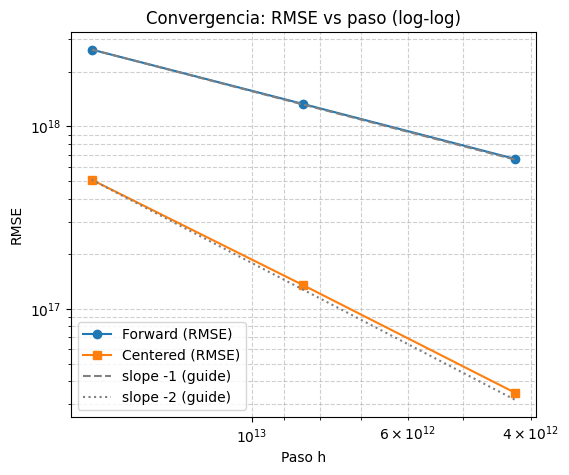

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
h = np.array([1.691479e13, 8.446809e12, 4.220763e12])
RMSE_f = np.array([2.637242e18, 1.326052e18, 6.640547e17])
RMSE_c = np.array([5.089598e17, 1.344130e17, 3.465472e16])

plt.figure(figsize=(6,5))
plt.loglog(h, RMSE_f, 'o-', label='Forward (RMSE)')
plt.loglog(h, RMSE_c, 's-', label='Centered (RMSE)')

# rectas guía con pendiente -1 y -2 (normales)
h_line = np.array([h.min(), h.max()])
plt.loglog(h_line, RMSE_f[0]*(h_line/h[0])**1, '--', color='gray', label='slope -1 (guide)')
plt.loglog(h_line, RMSE_c[0]*(h_line/h[0])**2, ':', color='gray', label='slope -2 (guide)')

plt.gca().invert_xaxis()  # opcional: mostrar h grande a la izquierda
plt.xlabel('Paso h')
plt.ylabel('RMSE')
plt.title('Convergencia: RMSE vs paso (log-log)')
plt.legend()
plt.grid(True, which='both', ls='--', alpha=0.6)
plt.show()

Graficar $P(rho)$ y derivadas


Text(0.5, 1.0, 'Derivadas: comparación')

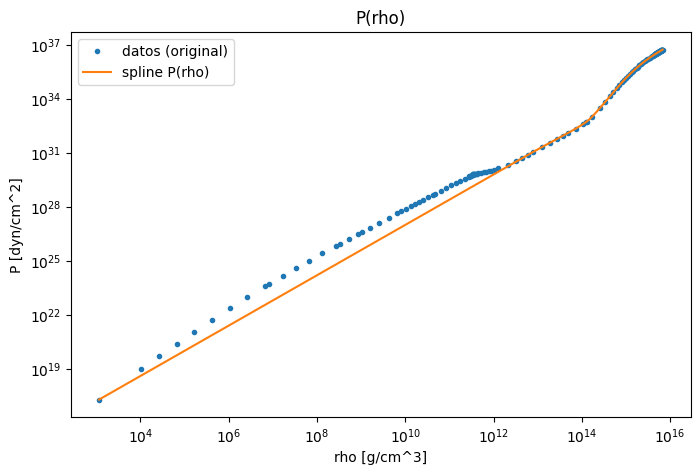

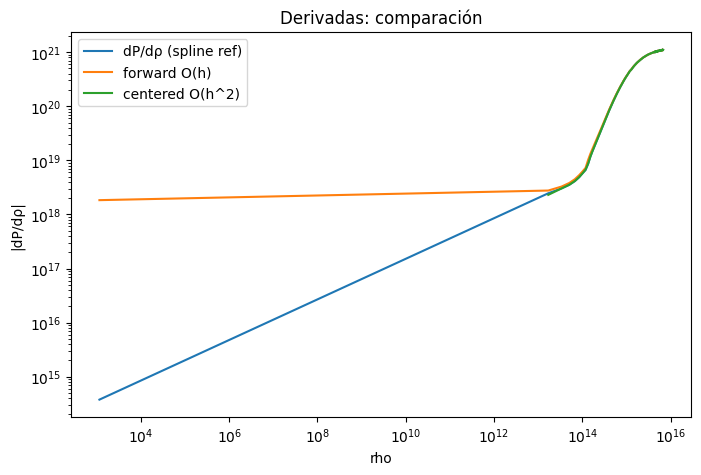

In [ ]:
# P(rho)
plt.figure()
plt.loglog(rho, P, '.', label='datos (original)')
rplot = np.linspace(rho_min, rho_max, 800)
plt.loglog(rplot, spline_P(rplot), '-', label='spline P(rho)')
plt.xlabel('rho [g/cm^3]'); plt.ylabel('P [dyn/cm^2]')
plt.legend(); plt.title('P(rho)')

# derivadas
plt.figure()
h_r = results['h']['rho']
plt.loglog(h_r, np.abs(results['h']['df_ref']), label='dP/dρ (spline ref)')
plt.loglog(h_r, np.abs(results['h']['df_f']), label='forward O(h)')
plt.loglog(h_r, np.abs(results['h']['df_c']), label='centered O(h^2)')
plt.xlabel('rho'); plt.ylabel('|dP/dρ|')
plt.legend(); plt.title('Derivadas: comparación')

Encontrar rho tal que dP/dρ = c^2


In [ ]:
def f_r(r): return dPdr_of_rho(r) - c2
def df_r(r): return d2Pdr2_of_rho(r)

r_eval = np.linspace(rho_min, rho_max, 2000)
fvals = f_r(r_eval)
sign_changes = []
for i in range(len(r_eval)-1):
    if np.isfinite(fvals[i]) and np.isfinite(fvals[i+1]) and fvals[i]*fvals[i+1] < 0:
        sign_changes.append((r_eval[i], r_eval[i+1]))

print("Intervalos con cambio de signo (hasta 10):", sign_changes[:10])

Intervalos con cambio de signo (hasta 10): [(np.float64(3041945472737000.0), np.float64(3045321660831046.5))]


Bisección y Newton

In [ ]:
def bisection(func, a, b, tol=1e-10, maxiter=200):
    fa, fb = func(a), func(b)
    if not (np.isfinite(fa) and np.isfinite(fb)):
        raise ValueError("Valores no finitos en extremos")
    if fa*fb > 0:
        raise ValueError("No hay cambio de signo en [a,b]")
    for i in range(maxiter):
        c = 0.5*(a+b)
        fc = func(c)
        if abs(fc) < tol or (b-a)/2 < tol:
            return c, i+1
        if fa*fc < 0:
            b, fb = c, fc
        else:
            a, fa = c, fc
    return c, maxiter

def newton_raphson(func, dfunc, x0, tol=1e-12, maxiter=200):
    x = x0
    for i in range(maxiter):
        fx = func(x)
        dfx = dfunc(x)
        if not np.isfinite(fx) or not np.isfinite(dfx):
            raise ValueError("No finito en Newton")
        if abs(fx) < tol:
            return x, i
        if abs(dfx) < 1e-20:
            raise ValueError("Derivada demasiado pequeña")
        x = x - fx/dfx
    raise RuntimeError("Newton no convergió")

if len(sign_changes) > 0:
    a,b = sign_changes[0]
    rho_bisect, iters_b = bisection(f_r, a, b)
    print("Bisección: rho =", rho_bisect, "iters:", iters_b)
    # Newton inicializado en centro del intervalo
    try:
        rho_newton, it_new = newton_raphson(f_r, df_r, 0.5*(a+b))
        print("Newton: rho =", rho_newton, "iters:", it_new)
    except Exception as e:
        print("Newton falló:", e)
else:
    print("No se encontró intervalo con cambio de signo para dP/dρ - c^2.")

Bisección: rho = 3044043758124642.5 iters: 41
Newton: rho = 3044043758124643.0 iters: 3


Calcular $ε(rho)$ por integración acumulada

In [ ]:

rgrid = results['h']['rho']
Pgrid = results['h']['P']
integrand = Pgrid / (rgrid**2)
I_trap = cumtrapz(integrand, rgrid, initial=0.0)
eps_trap = rgrid * c2 + rgrid * I_trap

# Simpson acumulado (prefijos)
I_simp = np.zeros_like(rgrid)
for i in range(1, len(rgrid)):
    if i+1 >= 3:
        I_simp[i] = simps(integrand[:i+1], rgrid[:i+1])
    else:
        I_simp[i] = I_trap[i]
eps_simp = rgrid * c2 + rgrid * I_simp

Interpolar $ε$ y calcular $dP/dε$, nueva $s^2$


In [ ]:
spline_eps = CubicSpline(rgrid, eps_trap)
def eps_of_rho(x): return spline_eps(x)
def dEpsdr_of_rho(x): return spline_eps.derivative()(x)

dPdr_at_r = dPdr_of_rho(rgrid)
depsdr_at_r = dEpsdr_of_rho(rgrid)

# prevenir divide by zero
mask_finite = np.isfinite(dPdr_at_r) & np.isfinite(depsdr_at_r) & (np.abs(depsdr_at_r) > 0)
dp_de = np.full_like(dPdr_at_r, np.nan)
dp_de[mask_finite] = dPdr_at_r[mask_finite] / depsdr_at_r[mask_finite]
s2_new = np.full_like(dp_de, np.nan)
s2_new[mask_finite] = c2 * dp_de[mask_finite]

frac_sublum = np.sum((s2_new < c2) & np.isfinite(s2_new)) / np.sum(np.isfinite(s2_new))
print(f"Fracción de puntos con s^2 < c^2: {frac_sublum:.3f}")

Fracción de puntos con s^2 < c^2: 1.000


Gráficos finales: $ε$ y comparación $s^2$ vs $c^2$

Text(0.5, 1.0, 'Velocidad del sonido (comparación)')

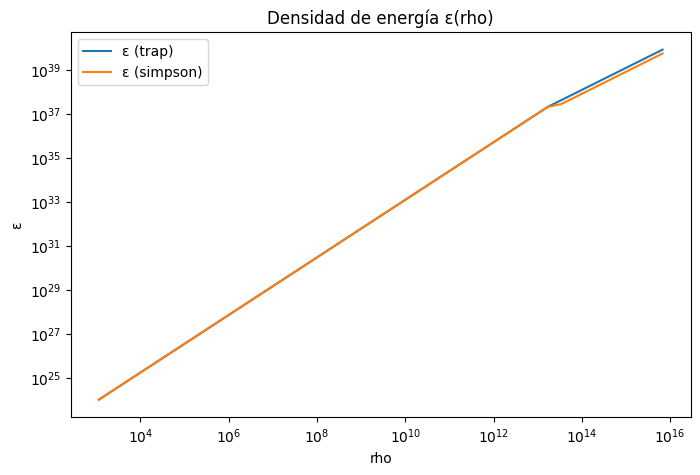

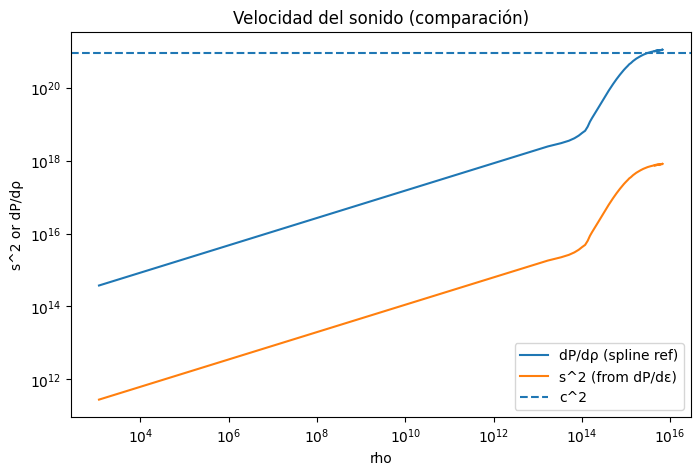

In [ ]:
plt.figure()
plt.loglog(rgrid, eps_trap, label='ε (trap)')
plt.loglog(rgrid, eps_simp, label='ε (simpson)')
plt.xlabel('rho'); plt.ylabel('ε')
plt.legend(); plt.title('Densidad de energía ε(rho)')

plt.figure()
plt.loglog(rgrid, np.abs(dPdr_at_r), label='dP/dρ (spline ref)')
plt.loglog(rgrid, np.abs(s2_new), label='s^2 (from dP/dε)')
plt.axhline(c2, linestyle='--', label='c^2')
plt.xlabel('rho'); plt.ylabel('s^2 or dP/dρ')
plt.legend(); plt.title('Velocidad del sonido (comparación)')

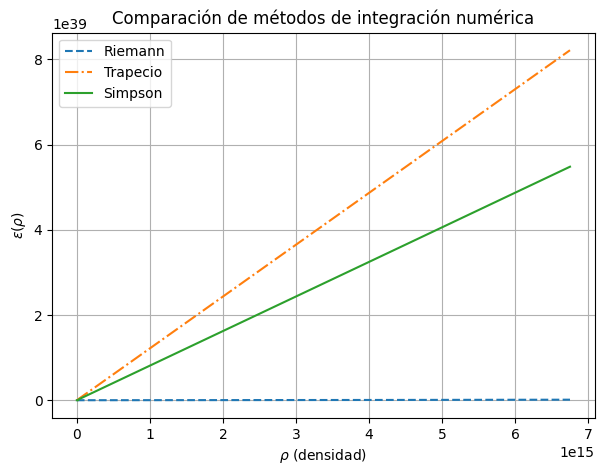

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumulative_trapezoid, simpson  # 👈 usa simpson (nuevo nombre)

# Constante de la velocidad de la luz (cm/s)
c2 = (2.99792458e10)**2

# --- Integrandos ---
rgrid = results['h']['rho']
Pgrid = results['h']['P']
integrand = Pgrid / (rgrid**2)

# --- 1. Riemann (suma directa) ---
dr = np.diff(rgrid, prepend=rgrid[0])
I_riem = np.cumsum(integrand * dr)
eps_riem = rgrid * c2 + rgrid * I_riem

# --- 2. Trapecio (Scipy) ---
I_trap = cumulative_trapezoid(integrand, rgrid, initial=0.0)
eps_trap = rgrid * c2 + rgrid * I_trap

# --- 3. Simpson (nuevo nombre de función) ---
I_simp = np.zeros_like(rgrid)
for i in range(2, len(rgrid)):
    I_simp[i] = simpson(integrand[:i+1], x=rgrid[:i+1])
eps_simp = rgrid * c2 + rgrid * I_simp

# --- Graficar comparación ---
plt.figure(figsize=(7,5))
plt.plot(rgrid, eps_riem, '--', label='Riemann')
plt.plot(rgrid, eps_trap, '-.', label='Trapecio')
plt.plot(rgrid, eps_simp, '-', label='Simpson')
plt.xlabel(r'$\rho$ (densidad)')
plt.ylabel(r'$\varepsilon(\rho)$')
plt.title('Comparación de métodos de integración numérica')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
s2_interp = np.gradient(Pgrid, rgrid)     # dP/dρ
s2_eps = s2_interp / (1 + Pgrid/(rgrid*c2))  # dP/dε simplificado
results['h']['s2_interp'] = s2_interp
results['h']['s2_eps'] = s2_eps


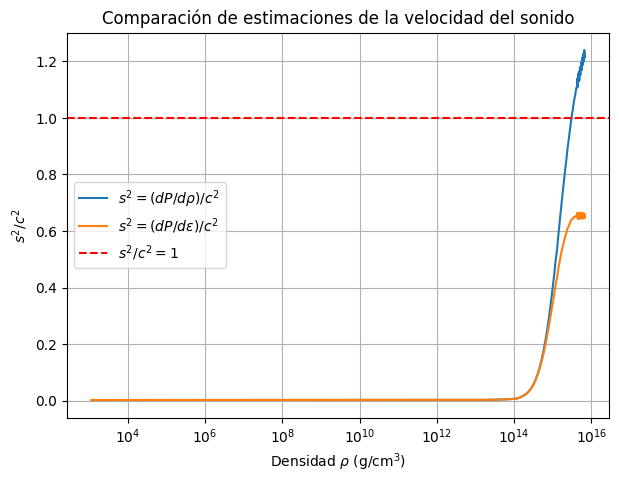

In [ ]:
# Comparación entre derivadas dP/dρ y dP/dε
plt.figure(figsize=(7,5))

plt.plot(rgrid, results['h']['s2_interp']/c2, label=r"$s^2 = (dP/d\rho)/c^2$")
plt.plot(rgrid, results['h']['s2_eps']/c2, label=r"$s^2 = (dP/d\varepsilon)/c^2$")
plt.axhline(1, color='r', linestyle='--', label=r"$s^2/c^2 = 1$")

plt.xscale('log')
plt.xlabel(r"Densidad $\rho$ (g/cm$^3$)")
plt.ylabel(r"$s^2 / c^2$")
plt.title("Comparación de estimaciones de la velocidad del sonido")
plt.legend()
plt.grid(True)
plt.show()

